In [28]:
import numpy as np

X=np.load('/content/drive/My Drive/catsvsdogs/X.npy')
cat_y=np.load('/content/drive/My Drive/catsvsdogs/cat_y.npy')

#loading the save numpy arrays in the previous code

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_cat_train, y_cat_test = train_test_split(X, cat_y, test_size=0.1)

In [30]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten, Dropout
from keras.layers import Conv2D,MaxPooling2D

model=Sequential()

model.add(Conv2D(256,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(32,activation='relu'))
model.add(Dropout(0.5))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [31]:
history=model.fit(X_train,y_cat_train,epochs=20, validation_data=(X_test,y_cat_test))

Train on 22449 samples, validate on 2495 samples
Epoch 1/20
22449/22449 [==============================] - 19s 861us/step - loss: 0.6900 - accuracy: 0.5257 - val_loss: 0.6783 - val_accuracy: 0.5735
Epoch 2/20
22449/22449 [==============================] - 19s 850us/step - loss: 0.6823 - accuracy: 0.5630 - val_loss: 0.6720 - val_accuracy: 0.5840
Epoch 3/20
22449/22449 [==============================] - 19s 848us/step - loss: 0.6691 - accuracy: 0.5904 - val_loss: 0.6412 - val_accuracy: 0.6457
Epoch 4/20
22449/22449 [==============================] - 19s 846us/step - loss: 0.6287 - accuracy: 0.6566 - val_loss: 0.5871 - val_accuracy: 0.6978
Epoch 5/20
22449/22449 [==============================] - 19s 844us/step - loss: 0.5769 - accuracy: 0.7040 - val_loss: 0.5684 - val_accuracy: 0.7034
Epoch 6/20
22449/22449 [==============================] - 19s 841us/step - loss: 0.5386 - accuracy: 0.7361 - val_loss: 0.5385 - val_accuracy: 0.7419
Epoch 7/20
22449/22449 [==============================] -

In [32]:
import pandas as pd
loss_df = pd.DataFrame(model.history.history)

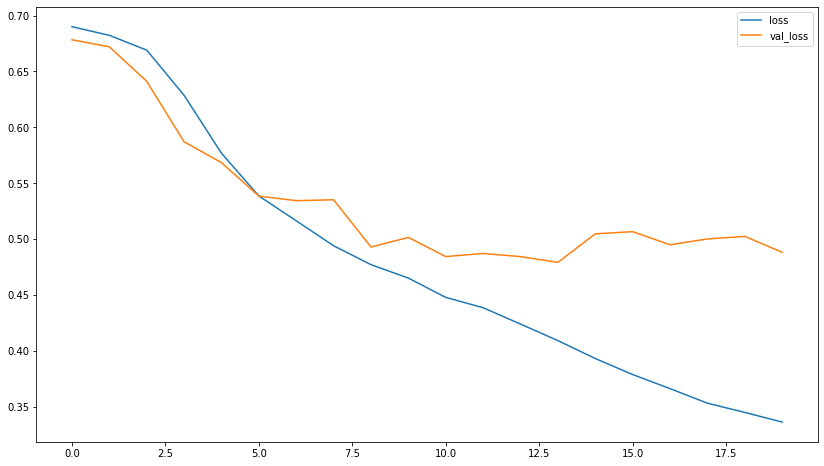

In [33]:
loss_df[['loss','val_loss']].plot(figsize=(14,8))

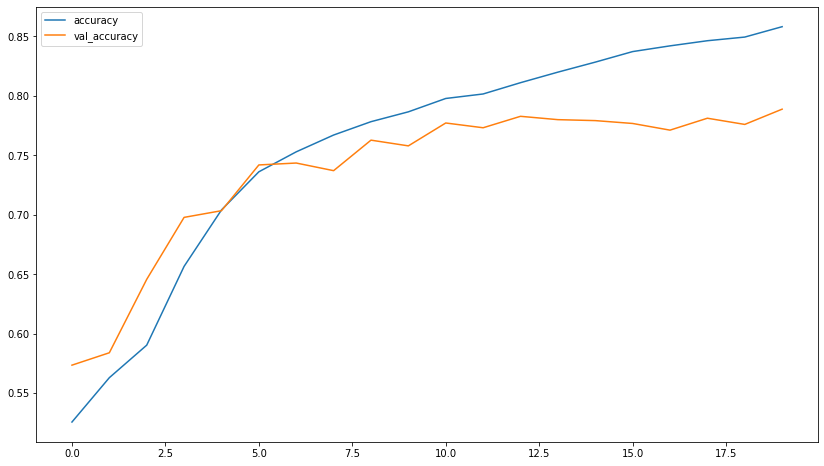

In [34]:
loss_df[['accuracy','val_accuracy']].plot(figsize=(14,8))

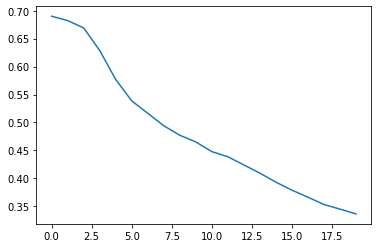

In [35]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'])

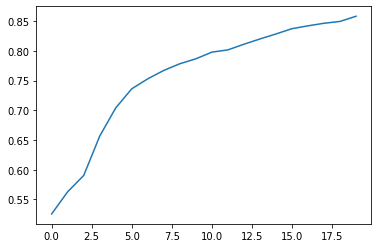

In [36]:
plt.plot(history.history['accuracy'])
#if not working replace 'accuracy' with 'acc'

In [37]:
print(model.evaluate(X_test,y_cat_test))

2495/2495 [==============================] - 1s 327us/step
[0.48825962166031284, 0.7887775301933289]


In [38]:
model.save_weights('catsvsdogs.model')

In [39]:
model.save('catsvsdogs.h5')